# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


## Решение

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Используем данные об уровне счастья в разных странах за 2019 год:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/lavcho/pydp-20/master/stpy-25_hw-16/data/2018.csv')

In [4]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


### Гистограмма распределения восприятия коррупции

Распределение показателя восприятия коррупции показывает, что это распределение с толстым хвостом. В-основном все значения расположены в районе 0,08 (медиана - см. выше), однако заметное количество стран имеет высокие показатели. Удручает то, что нигде явно не сказано, чем выше показатель, тем выше, или ниже уровень восприятия коррупции?

**Предположение:** существует группа стран с аномально высоким уровнем восприятия коррупции (если считать, что чем больше показатель, тем выше уровень восприятия коррупции).

<AxesSubplot:title={'center':'Распределение показателя восприятия коррупции'}, ylabel='Frequency'>

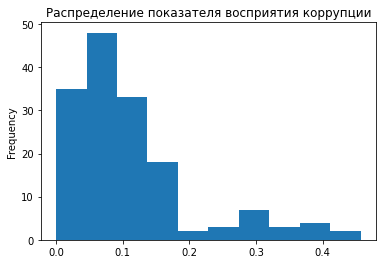

In [22]:
df['Perceptions of corruption'].plot(kind='hist', 
                   title='Распределение показателя восприятия коррупции')

### Индекс счастья у двух групп стран по восприятию коррупции

Сравним между собой средний индекс счастья у двух групп стран:
1) у тех, чей показатель восприятия коррупции ниже 0.2;
2) у тех, чей показатель восприятия коррупции выше 0.2.

**Предположение:** группа стран с показателем восприятия коррупции выше 0.2 имеет более высокие показатели индекса счастья. Следовательно, скорее всего, чем выше показатель восприятия коррупции, тем меньше коррупции.

<BarContainer object of 2 artists>

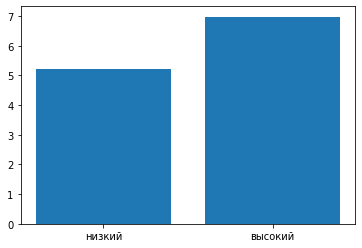

In [44]:
Score_corrupt = {
    'низкий': df.loc[df['Perceptions of corruption']<=0.2]['Score'].mean(),
    'высокий': df.loc[df['Perceptions of corruption']>0.2]['Score'].mean()
}
plt.bar(x=list(Score_corrupt.keys()), height=list(Score_corrupt.values()))

### Индекс счастья и ВВП

Наблюдается, но не ярко выраженная, зависимость индекса счастья от ВВП. Чем выше ВВП на душу населения, тем выше индекс счастья. 

Text(0, 0.5, 'Индекс счастья')

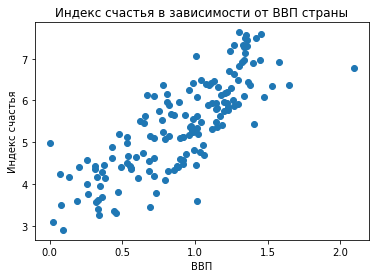

In [108]:
df.sort_values(by='GDP per capita', inplace=True)
plt.scatter(df['GDP per capita'],df['Score'])
plt.title('Индекс счастья в зависимости от ВВП страны')
plt.xlabel('ВВП')
plt.ylabel('Индекс счастья')

### Обнаружение зависимостей между остальными показателями и индексом счастья

1. Индекс счастья прямо пропорционально зависит от социальной поддержки.
1. Индекс счастья прямо пропорционально зависит от ожидаемой продолжительности здоровой жизни.
1. Остальные пары сильных связей не обнаруживают.

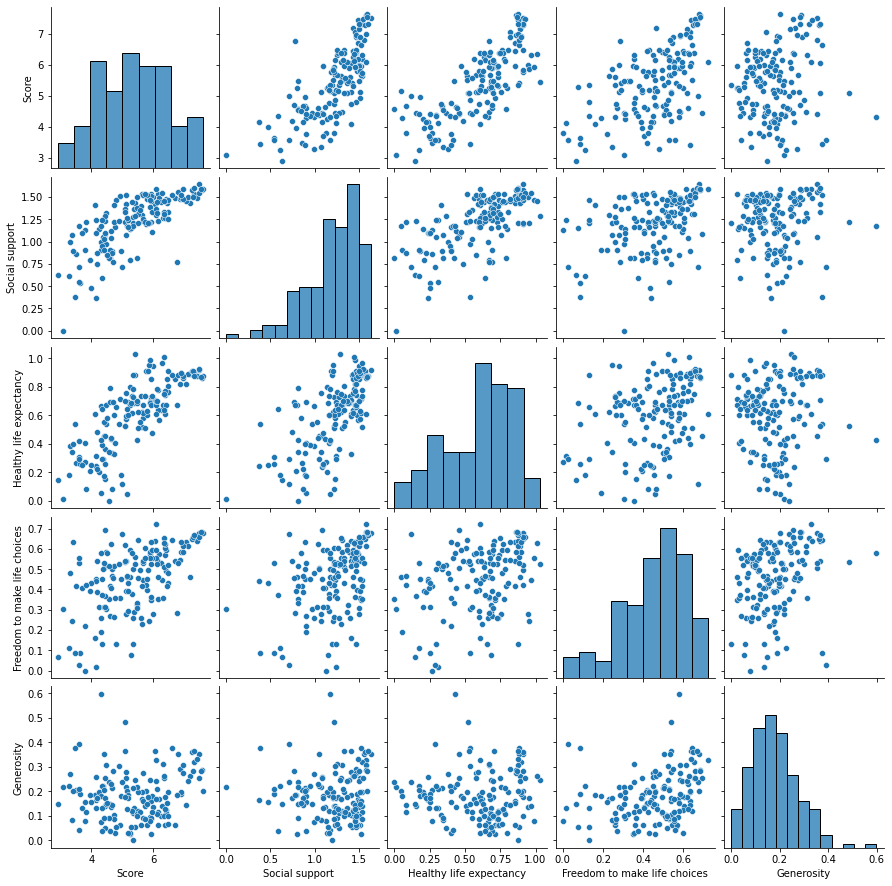

In [54]:
sns.pairplot(df[['Score', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity']])

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.